In [322]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/country_wise_latest.csv
/kaggle/input/corona-virus-report/day_wise.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv
/kaggle/input/corona-virus-report/worldometer_data.csv
/kaggle/input/corona-virus-report/full_grouped.csv


In [323]:
import pandas as pd

# Load your dataset
# Replace 'file_path' with the path to your dataset
import os
file_path = "/kaggle/input/corona-virus-report/covid_19_clean_complete.csv"

df = pd.read_csv(file_path)

# 1. Dataset Characteristics
print("=== Dataset Characteristics ===")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

# Check if dataset contains sufficient rows and columns
if df.shape[0] > 1000 and df.shape[1] > 5:
    print("The dataset has enough records and features for analysis.")
else:
    print("The dataset may not have sufficient records or features for meaningful analysis.")

# Display the first few rows to understand the data structure
print("\nSample Data:")
print(df.head())

# 2. Feature Types
print("\n=== Feature Types ===")
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

# Check for possible time-series data
time_series_features = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
print(f"Potential Time-Series Features: {time_series_features}")

# 3. Check for missing values
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# 4. Basic Statistics
print("\n=== Basic Statistics for Numerical Features ===")
print(df[numerical_features].describe())

# Check diversity of categorical features
print("\n=== Unique Values in Categorical Features ===")
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")

# 5. Data type summary
print("\n=== Data Type Summary ===")
print(df.dtypes)


=== Dataset Characteristics ===
Number of Rows: 49068
Number of Columns: 10
The dataset has enough records and features for analysis.

Sample Data:
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

=== Feature Types ===
Numerical Features: ['Lat', 'L

=== Missing Values ===
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

=== Dataset Features ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory us

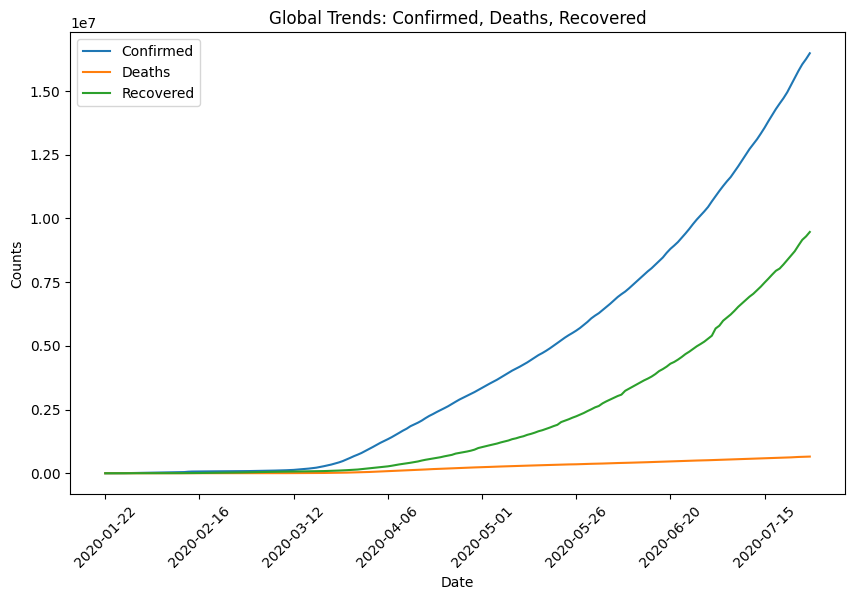


=== Correlation Matrix ===
           Confirmed    Deaths  Recovered    Active
Confirmed   1.000000  0.912361   0.895506  0.950255
Deaths      0.912361  1.000000   0.763090  0.891858
Recovered   0.895506  0.763090   1.000000  0.713088
Active      0.950255  0.891858   0.713088  1.000000


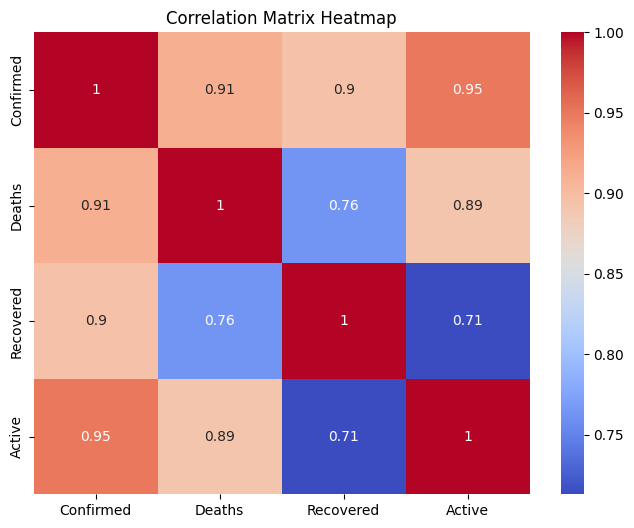


Geographical Visualization Ready: True

Target variable available for ML: Confirmed
Dataset size sufficient for ML: True

Preprocessed dataset saved to preprocessed_covid_data.csv


In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/kaggle/input/corona-virus-report/covid_19_clean_complete.csv"
df = pd.read_csv(file_path)

# === 2. Suitability for EDA ===

# Check for missing values
missing_values = df.isnull().sum()
print("=== Missing Values ===")
print(missing_values)

# Visualizable Features: Quick Summary
print("\n=== Dataset Features ===")
print(df.info())
print(df.describe())

# Check trends: Cases and recoveries over time
time_series = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()
print("\n=== Cases Over Time ===")
print(time_series.head())

# Plot trends
time_series.plot(figsize=(10, 6))
plt.title("Global Trends: Confirmed, Deaths, Recovered")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Correlation analysis
numerical_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active']
correlation_matrix = df[numerical_columns].corr()
print("\n=== Correlation Matrix ===")
print(correlation_matrix)

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Geographical Visualization Readiness
geo_ready = 'Lat' in df.columns and 'Long' in df.columns
print("\nGeographical Visualization Ready:", geo_ready)

# === 3. Preprocessing Feasibility ===

# Clean missing values in 'Province/State' (can drop or replace with "Unknown")
df['Province/State'] = df['Province/State'].fillna("Unknown")

# Remove outliers (e.g., negative Active cases)
df = df[df['Active'] >= 0]

# Feature Engineering: Add case fatality rate and recovery rate
df['Case Fatality Rate'] = (df['Deaths'] / df['Confirmed']).replace([np.inf, -np.inf], 0).fillna(0)
df['Recovery Rate'] = (df['Recovered'] / df['Confirmed']).replace([np.inf, -np.inf], 0).fillna(0)

# Normalize numerical features (scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Confirmed', 'Deaths', 'Recovered', 'Active']] = scaler.fit_transform(df[['Confirmed', 'Deaths', 'Recovered', 'Active']])

# Encode categorical data
df_encoded = pd.get_dummies(df, columns=['Country/Region', 'WHO Region'])

# === 4. Machine Learning Applicability ===

# Check target variable availability
target = 'Confirmed'  # Example target variable
if target in df.columns:
    print("\nTarget variable available for ML:", target)

# Ensure dataset size allows train-test split
train_test_ready = df.shape[0] > 1000
print("Dataset size sufficient for ML:", train_test_ready)

# Splitting data for ML
from sklearn.model_selection import train_test_split
X = df.drop(columns=[target, 'Date'])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 5. Streamlit Integration ===
# Streamlit visualizations like sliders, dropdowns, maps
# Save a subset of the preprocessed dataset for use in Streamlit
output_file = "preprocessed_covid_data.csv"
df.to_csv(output_file, index=False)
print(f"\nPreprocessed dataset saved to {output_file}")


In [325]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active,Case Fatality Rate,Recovery Rate
count,49050.000000,49050.000000,4.905000e+04,49050.000000,49050.000000,49050.000000,49050.000000,49050.000000
mean,21.430039,23.516218,3.937051e-03,0.005976,0.004288,0.002872,0.022245,0.377650
std,24.952212,70.445264,2.967727e-02,0.042664,0.029681,0.027081,0.040711,0.385494
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.873054,-15.310100,9.323446e-07,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.634500,21.745300,3.915848e-05,0.000014,0.000016,0.000009,0.007062,0.250000
75%,41.204380,80.771797,3.542910e-04,0.000203,0.000361,0.000215,0.028909,0.779011
max,71.706900,178.065000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [326]:
print(df.columns)

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region', 'Case Fatality Rate',
       'Recovery Rate'],
      dtype='object')


In [327]:
import pandas as pd

# Load the Covid-19 dataset
df = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv') 
# Inspect the first few rows of the dataframe
print(df.head())

# Calculate descriptive statistics for the numerical columns (cases, deaths, recoveries)
numerical_columns = ['Confirmed', 'Deaths', 'Recovered'] 

# Mean
mean_values = df[numerical_columns].mean()
print("\nMean Values:")
print(mean_values)

# Median
median_values = df[numerical_columns].median()
print("\nMedian Values:")
print(median_values)

# Mode
mode_values = df[numerical_columns].mode().iloc[0]  # .mode() returns a DataFrame, so we select the first mode
print("\nMode Values:")
print(mode_values)

# Standard Deviation
std_dev_values = df[numerical_columns].std()
print("\nStandard Deviation Values:")
print(std_dev_values)

# Variance
variance_values = df[numerical_columns].var()
print("\nVariance Values:")
print(variance_values)

# Additional summary statistics: min, max, and percentiles (e.g., 25th, 50th, 75th percentiles)
summary_stats = df[numerical_columns].describe()
print("\nSummary Statistics (Min, Max, Percentiles, etc.):")
print(summary_stats)


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

Mean Values:
Confirmed    16884.904255
Deaths         884.179160
Recovered     7915.713479
dtype: float64

Median Values:
Confirmed    168.0
Deaths         2.0
Recovered     29.0
dtype: float64

Mode 

# Exploratory Data Analysis (EDA)


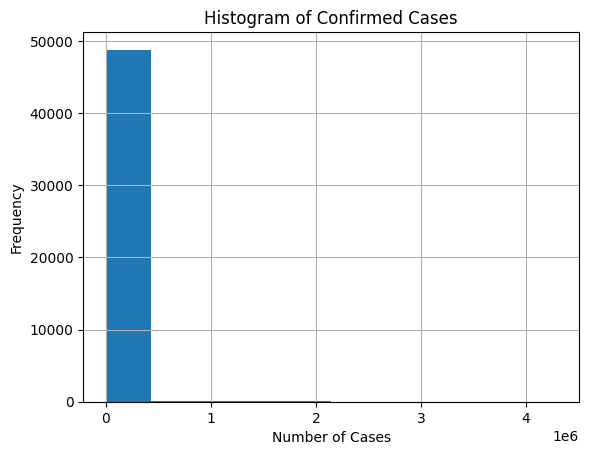

In [328]:
import matplotlib.pyplot as plt

# Histogram for 'Confirmed' column
df['Confirmed'].hist()
plt.title('Histogram of Confirmed Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.show()


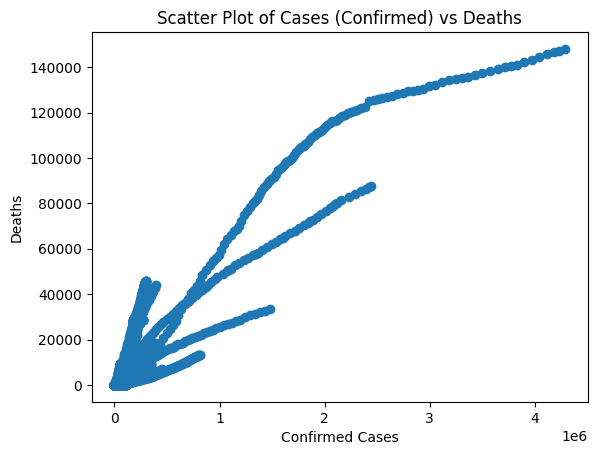

In [329]:
import matplotlib.pyplot as plt

# Scatter plot for 'Confirmed' vs 'Deaths'
plt.scatter(df['Confirmed'], df['Deaths'])
plt.title('Scatter Plot of Cases (Confirmed) vs Deaths')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.show()


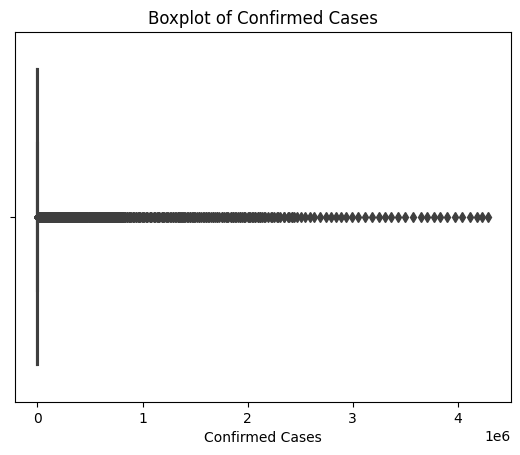

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for the 'Confirmed' (Cases) column
sns.boxplot(x=df['Confirmed'])
plt.title('Boxplot of Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.show()


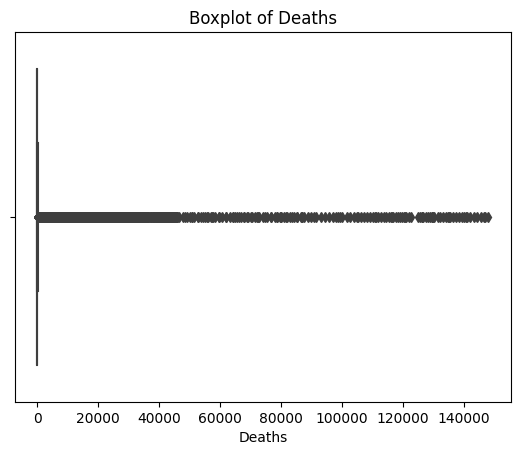

In [331]:
# Boxplot for the 'Deaths' column
sns.boxplot(x=df['Deaths'])
plt.title('Boxplot of Deaths')
plt.xlabel('Deaths')
plt.show()


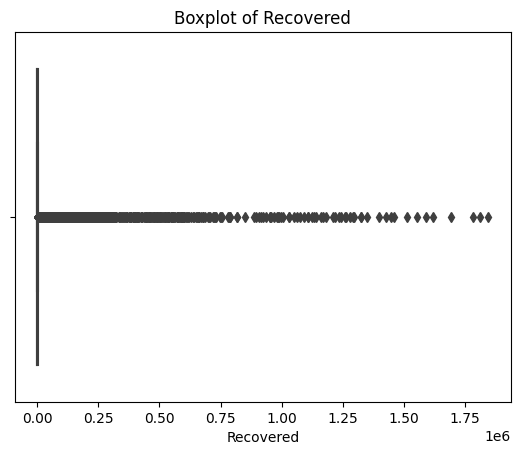

In [332]:
# Boxplot for the 'Deaths' column
sns.boxplot(x=df['Recovered'])
plt.title('Boxplot of Recovered')
plt.xlabel('Recovered')
plt.show()


<Axes: xlabel='Country/Region'>

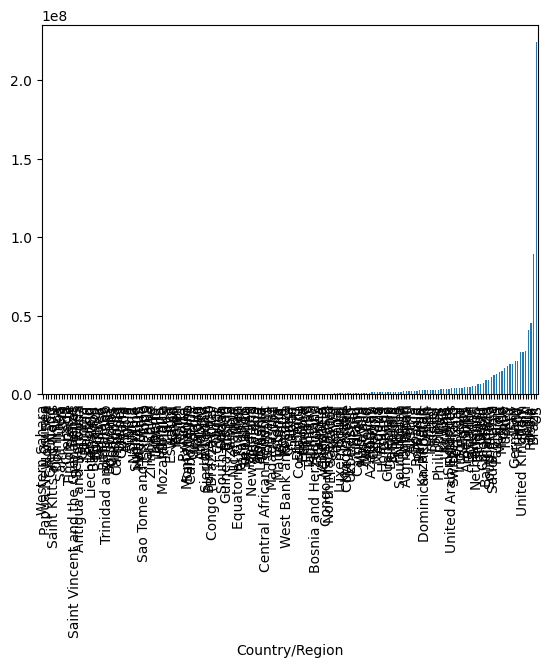

In [333]:
data.groupby('Country/Region')['Confirmed'].sum().sort_values().plot(kind='bar')


**Correlation Analysis**

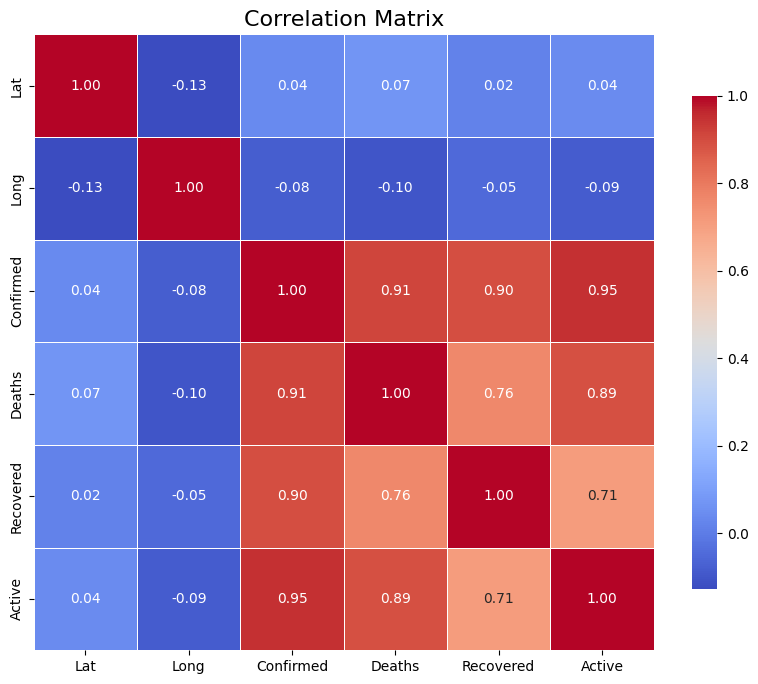

In [334]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix on numeric columns only
corr = numeric_df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the plot
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Add a title and display the plot
plt.title('Correlation Matrix', fontsize=16)
plt.show()


**Missing Values**

Missing values per column:
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


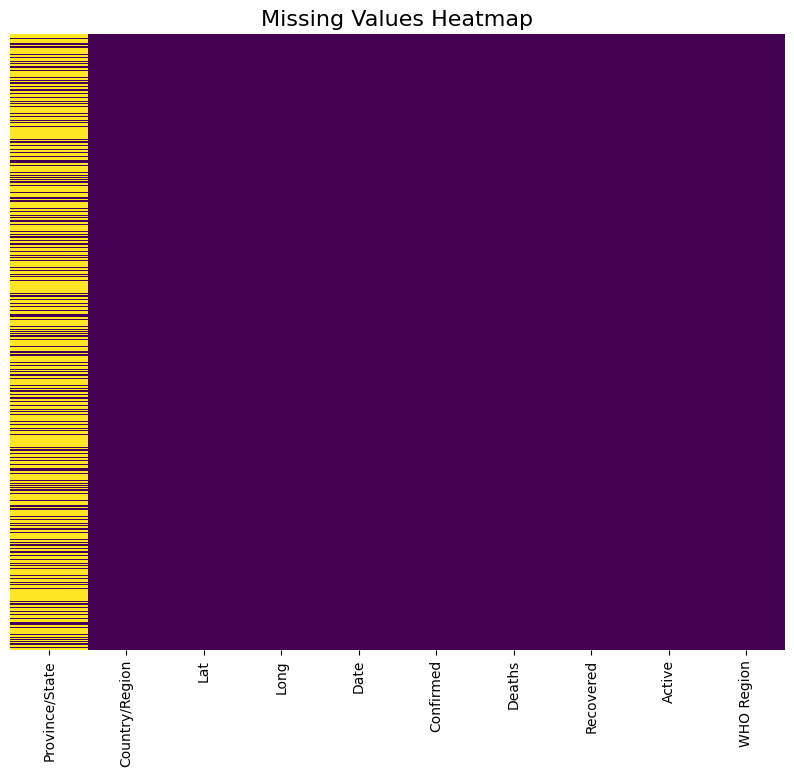

In [335]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print("Missing values per column:")
print(missing_values)

# Visualize missing values with a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size of the plot
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

# Add a title and display the plot
plt.title('Missing Values Heatmap', fontsize=16)
plt.show()


**Outlier Detection**

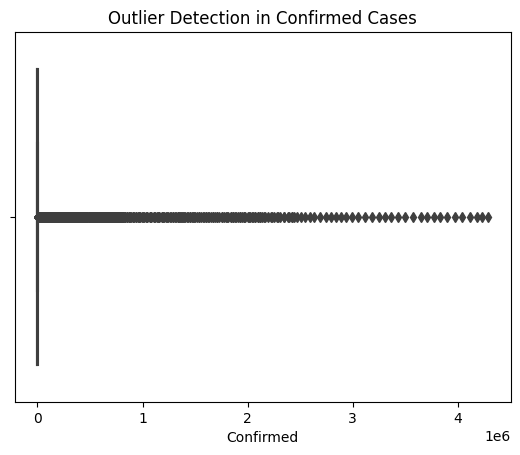

In [336]:
# Using box plot to detect outliers in 'Confirmed' (cases)
sns.boxplot(x=df['Confirmed'])
plt.title('Outlier Detection in Confirmed Cases')
plt.show()


<ipython-input-337-ae3f71611739>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Confirmed'], shade=True)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


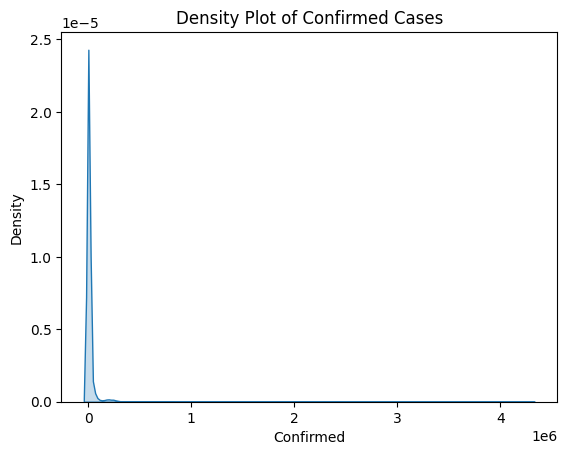

In [337]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for 'Confirmed' (cases) column
sns.kdeplot(df['Confirmed'], shade=True)
plt.title('Density Plot of Confirmed Cases')
plt.show()


In [338]:
# Check data types of all columns
print(df.dtypes)

# Check the number of unique values in the 'Country/Region' column
unique_countries = df['Country/Region'].nunique()
print(f"Number of unique countries: {unique_countries}")

# Check the actual unique values and their counts
country_counts = df['Country/Region'].value_counts()
print(country_counts)


Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
Active              int64
WHO Region         object
dtype: object
Number of unique countries: 187
Country/Region
China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Holy See           188
Honduras           188
Hungary            188
Iceland            188
Lesotho            188
Name: count, Length: 187, dtype: int64


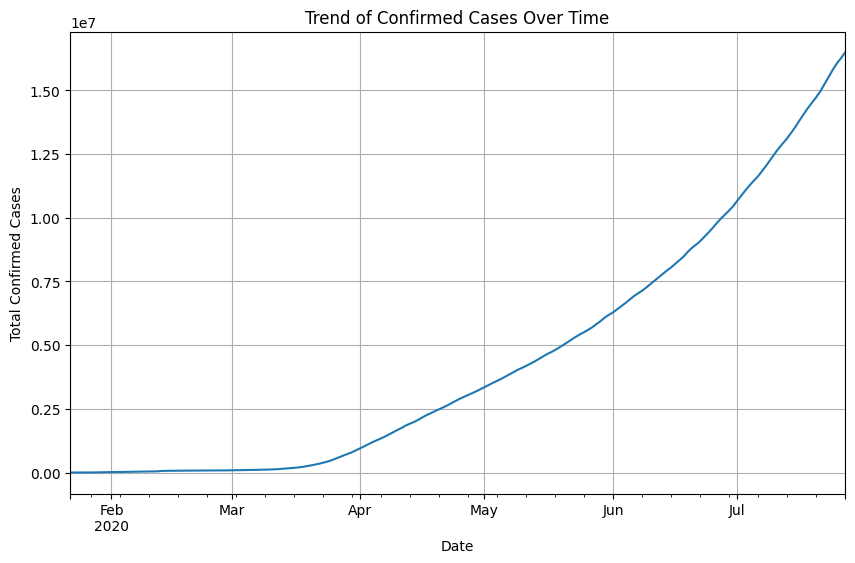

In [339]:
# Assuming the dataset has a 'date' column, convert to datetime
df['Date'] = pd.to_datetime(df['Date'])  # Make sure the column name is 'Date' or adjust accordingly

# Group by 'Date' and sum the 'Confirmed' cases
df_grouped = df.groupby('Date')['Confirmed'].sum()

# Plotting the trend over time
df_grouped.plot(kind='line', figsize=(10, 6))
plt.title('Trend of Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.show()

In [340]:
# Group by country and sum the confirmed cases
df_grouped_country = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)

# Display the result
print(df_grouped_country.head())


Country/Region
US        224345948
Brazil     89524967
Russia     45408411
India      40883464
Spain      27404045
Name: Confirmed, dtype: int64


In [341]:
# Creating a new column for case fatality rate (deaths / cases)
df['case_fatality_rate'] = df['Deaths'] / df['Confirmed']

# Display the result
print(df[['Country/Region', 'case_fatality_rate']].head())


  Country/Region  case_fatality_rate
0    Afghanistan                 NaN
1        Albania                 NaN
2        Algeria                 NaN
3        Andorra                 NaN
4         Angola                 NaN


# Data Preprocessing

**Missing Value Handling**

In [342]:
# Fill missing values in the 'Confirmed' column with the mean
df['Confirmed'].fillna(df['Confirmed'].mean(), inplace=True)

# Drop rows with missing values in other critical columns ('Confirmed' and 'Deaths')
df.dropna(subset=['Confirmed', 'Deaths'], inplace=True)

# Display the first few rows of the updated dataframe
print("First 5 rows after missing value handling:")
print(df.head())

# Verify if there are still any missing values
print("\nMissing values after cleaning:")
print(df.isnull().sum())


First 5 rows after missing value handling:
  Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  case_fatality_rate  
0       0          0       0  Eastern Mediterranean                 NaN  
1       0          0       0                 Europe                 NaN  
2       0          0       0                 Africa                 NaN  
3       0          0       0                 Europe                 NaN  
4       0          0       0                 Africa                 NaN  

Missing values after cleaning:
Province/Sta

**Categorical Encoding**

In [343]:
# Ensure the preprocessor is properly fitted
preprocessor.fit(data)

# Display the original categorical feature
print("Original Categorical Feature (First 5 Rows):")
print(data[categorical_features].head())

# Get the names of the encoded features
encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out()
print("\nEncoded Categorical Features:")
print(encoded_columns)


Original Categorical Feature (First 5 Rows):
  Province/State Country/Region        Date             WHO Region
0            NaN    Afghanistan  2020-01-22  Eastern Mediterranean
1            NaN        Albania  2020-01-22                 Europe
2            NaN        Algeria  2020-01-22                 Africa
3            NaN        Andorra  2020-01-22                 Europe
4            NaN         Angola  2020-01-22                 Africa

Encoded Categorical Features:
['Country/Region_Afghanistan' 'Country/Region_Albania'
 'Country/Region_Algeria' 'Country/Region_Andorra' 'Country/Region_Angola'
 'Country/Region_Antigua and Barbuda' 'Country/Region_Argentina'
 'Country/Region_Armenia' 'Country/Region_Australia'
 'Country/Region_Austria' 'Country/Region_Azerbaijan'
 'Country/Region_Bahamas' 'Country/Region_Bahrain'
 'Country/Region_Bangladesh' 'Country/Region_Barbados'
 'Country/Region_Belarus' 'Country/Region_Belgium' 'Country/Region_Belize'
 'Country/Region_Benin' 'Country/Region

**Scaling Numerical Features**

In [344]:
# Ensure the numerical features match those seen during fit
numerical_features_fitted = preprocessor.named_transformers_['num'].feature_names_in_

# Select only the numerical features that were used during fit
numerical_data = data[numerical_features_fitted].copy()

# Print numerical features before scaling
print("Numerical Features Before Scaling:")
print(numerical_data.describe())

# Transform the data using the scaler fitted within the preprocessor
scaled_data = pd.DataFrame(
    preprocessor.named_transformers_['num'].transform(numerical_data),
    columns=numerical_features_fitted,  # Use the same column names for clarity
    index=numerical_data.index          # Preserve the original index
)

# Print scaled numerical features
print("Numerical Features After Scaling (First 5 Rows):")
print(scaled_data.head())


Numerical Features Before Scaling:
              Deaths     Recovered        Active     Confirmed
count   49068.000000  4.906800e+04  4.906800e+04  4.906800e+04
mean      884.179160  7.915713e+03  8.085012e+03  1.688490e+04
std      6313.584411  5.480092e+04  7.625890e+04  1.273002e+05
min         0.000000  0.000000e+00 -1.400000e+01  0.000000e+00
25%         0.000000  0.000000e+00  0.000000e+00  4.000000e+00
50%         2.000000  2.900000e+01  2.600000e+01  1.680000e+02
75%        30.000000  6.660000e+02  6.060000e+02  1.518250e+03
max    148011.000000  1.846641e+06  2.816444e+06  4.290259e+06
Numerical Features After Scaling (First 5 Rows):
     Deaths  Recovered    Active  Confirmed
0 -0.140045  -0.144446 -0.106022   -0.13264
1 -0.140045  -0.144446 -0.106022   -0.13264
2 -0.140045  -0.144446 -0.106022   -0.13264
3 -0.140045  -0.144446 -0.106022   -0.13264
4 -0.140045  -0.144446 -0.106022   -0.13264


**Processed Dataset Information**

In [345]:
print("Shape of Processed Dataset:")
print("X_processed:", X_processed.shape)

print("Processed Dataset (First 5 Rows):")
print(pd.DataFrame(X_processed).head())


Shape of Processed Dataset:
X_processed: (49068, 191)
Processed Dataset (First 5 Rows):
        0         1         2        3    4    5    6    7    8    9    ...  \
0 -0.140045 -0.144446 -0.106022 -0.13264  1.0  0.0  0.0  0.0  0.0  0.0  ...   
1 -0.140045 -0.144446 -0.106022 -0.13264  0.0  1.0  0.0  0.0  0.0  0.0  ...   
2 -0.140045 -0.144446 -0.106022 -0.13264  0.0  0.0  1.0  0.0  0.0  0.0  ...   
3 -0.140045 -0.144446 -0.106022 -0.13264  0.0  0.0  0.0  1.0  0.0  0.0  ...   
4 -0.140045 -0.144446 -0.106022 -0.13264  0.0  0.0  0.0  0.0  1.0  0.0  ...   

   181  182  183  184  185  186  187  188  189  190  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 191 columns]


**Train-Test Split Verification**

In [346]:
print("Train-Test Split Shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Train-Test Split Shapes:
X_train: (39240, 10), X_test: (9810, 10)
y_train: (39240,), y_test: (9810,)


In [347]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
data = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')

# Define features
numerical_features = ["Deaths", "Recovered", "Active", "Confirmed"]
categorical_features = ["Country/Region"]

# 1. Handle Missing Values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

data[numerical_features] = imputer_num.fit_transform(data[numerical_features])
data[categorical_features] = imputer_cat.fit_transform(data[categorical_features])

# 2. Pipeline for Encoding and Scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# 3. Apply the Preprocessor
X = data[numerical_features + categorical_features]  # Combine features for preprocessing
y = data['Confirmed']  # Define the target variable

X_processed = preprocessor.fit_transform(X)

# 4. Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Preprocessing Completed.")


Preprocessing Completed.


# Machine Learning Model

In [348]:
print(df.columns)


Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region', 'case_fatality_rate'],
      dtype='object')


Correlation Matrix:
             Deaths  Recovered    Active  Confirmed
Deaths     1.000000   0.763090  0.891858   0.912361
Recovered  0.763090   1.000000  0.713088   0.895506
Active     0.891858   0.713088  1.000000   0.950255
Confirmed  0.912361   0.895506  0.950255   1.000000


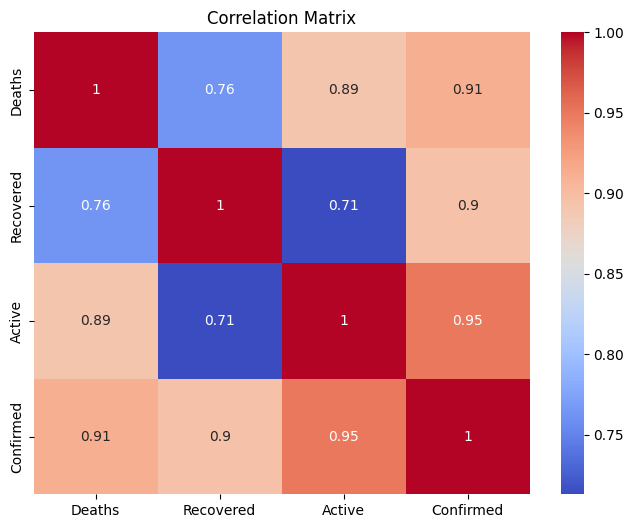

Linear Regression Evaluation:
MSE: 3.024330439610962e-21
RMSE: 5.499391275051232e-11
MAE: 4.086943350826085e-11
R²: 1.0
--------------------------------------------------
Random Forest Evaluation:
MSE: 2117518.703989343
RMSE: 1455.1696478381284
MAE: 165.52927450580793
R²: 0.9998887109809456
--------------------------------------------------


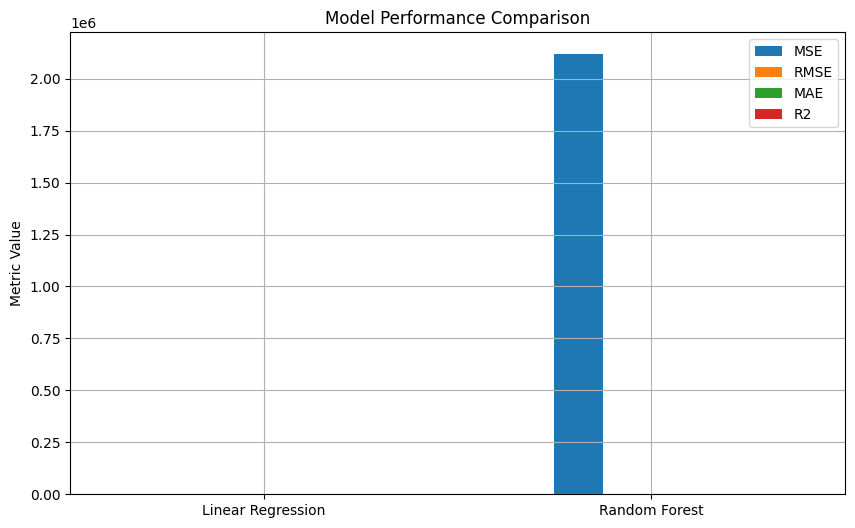

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


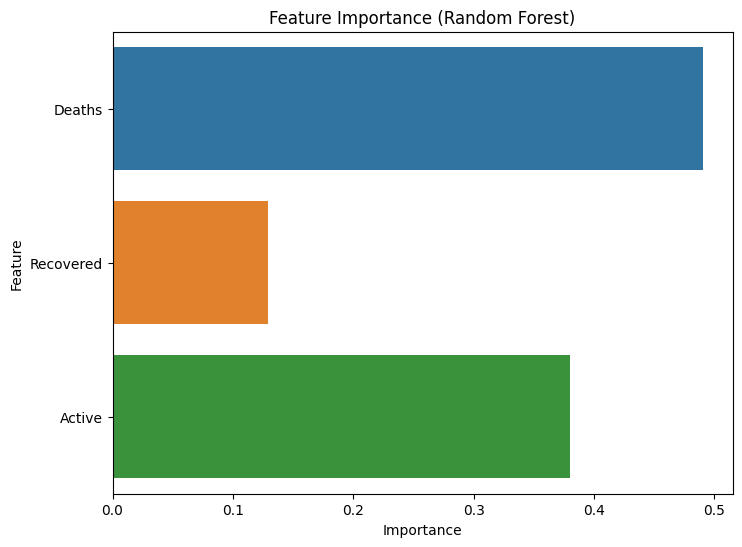

Random Forest Cross-Validation R² Scores: [0.99987918 0.99977169 0.99989578 0.99969523 0.99974487]
Random Forest Average R²: 0.9997973482061159


In [349]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')

# Handling missing data
numeric_features = ["Deaths", "Recovered", "Active", "Confirmed"]
imputer = SimpleImputer(strategy='mean')
data[numeric_features] = imputer.fit_transform(data[numeric_features])

# Exploratory Data Analysis (EDA)
print("Correlation Matrix:")
corr_matrix = data[numeric_features].corr()
print(corr_matrix)

# Visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Feature Selection
features = ["Deaths", "Recovered", "Active"]  # Strongest correlations with Confirmed
target_column = "Confirmed"

# Separate features (X) and target (y)
X = data[features]
y = data[target_column]

# Data Preprocessing and Scaling Pipeline
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Evaluation:")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}")
    print("-" * 50)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

metrics_lr = evaluate_model("Linear Regression", y_test, y_pred_lr)
metrics_rf = evaluate_model("Random Forest", y_test, y_pred_rf)

# Visualize Metrics
metrics_df = pd.DataFrame([metrics_lr, metrics_rf], index=["Linear Regression", "Random Forest"])
metrics_df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Cross-Validation for Random Forest
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores_rf = cross_val_score(rf_model, X_scaled, y, cv=cv, scoring='r2')
print(f"Random Forest Cross-Validation R² Scores: {scores_rf}")
print(f"Random Forest Average R²: {np.mean(scores_rf)}")
